Importing all the necessary Libraries

In [49]:
import pandas as pd
import seaborn as sns

## 1. Load Data

Raw dataset is loaded in this section

In [50]:
#Loading the data and storing into a dataframe
df = pd.read_csv('dataset/dataset.csv')

In [51]:
#Sample and total features
df.shape

(34857, 21)

In [52]:
#first five rows of the dataset
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [53]:
#all the columns in the dataset
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [54]:
#siplay samples, datatype of each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [55]:
#total nan values in each features
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [56]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


## 2. Exploratory Data Analysis

This step is necessary so understand the data

In [57]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Lets rename the columns name for ease use.

In [58]:

df = df.rename(columns ={'Suburb' : 'sub',
                    'Address' : 'add',
                    'Rooms' : 'rooms',
                    'Type' : 'type',
                    'Price' : 'price',
                    'Method' : 'sell-meth',
                    'SellerG' : 'seller',
                    'Date' : 'date',
                    'Distance' : 'dist',
                    'PostCode' : 'post-code',
                    'Bedroom2' : 'bed2',
                    'Bathroom' : 'bathroom',
                    'Car' : 'car',
                    'Landsize' : 'l-size',
                    'BuildingArea' : 'b-area',
                    'YearBuilt' : 'build-year',
                    'CouncilArea' : 'c-area',
                    'Lattitude' : 'lati',
                    'Longtitude' : 'long',
                    'Regionname' : 'reg-name',
                    'Propertycount' : 'prop-count'
} )

### 2.1 Mapping Feature samples for better understanding

There are lot samples with in understandable values, so lets map them with appropriate name first

In [59]:
# # Define mapping dictionaries for both columnsasdaf

# selling_method_mapping = {
#     'SS': 'Sold Before Auction',
#     'S': 'Sold',
#     'VB': 'Vendor Bid',
#     'SP': 'Sold Prior',
#     'PI': 'Passed In',
#     'SN': 'Sold Not Disclosed',
#     'W': 'Withdrawn',
#     'PN': 'Passed In, Vendor Bid',
#     'SA': 'Sold After Auction'
# }
# # Use the map function to replace values in both columns
# df['sell-meth'] = df['sell-meth'].map(selling_method_mapping)
# # Define mapping dictionaries for both columnsasdaf
# type_mapping = {'h': 'house', 'u': 'unit', 't': 'town'}
# df['type'] = df['type'].map(type_mapping)

# # Display the updated DataFrame
# df.head()


### 2.1 Univariate Analysis

This section covers all the data analysis for single variable exploratory data analysis

##### 2.1.1 Count Plot

<Axes: xlabel='sell-meth', ylabel='count'>

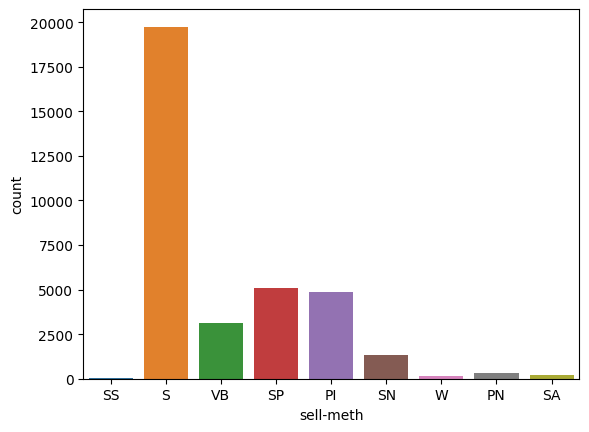

In [69]:
#lets check all the selling method for each house
sns.countplot(data = df, x = 'sell-meth', hue = df['sell-meth'])

<Axes: xlabel='rooms', ylabel='count'>

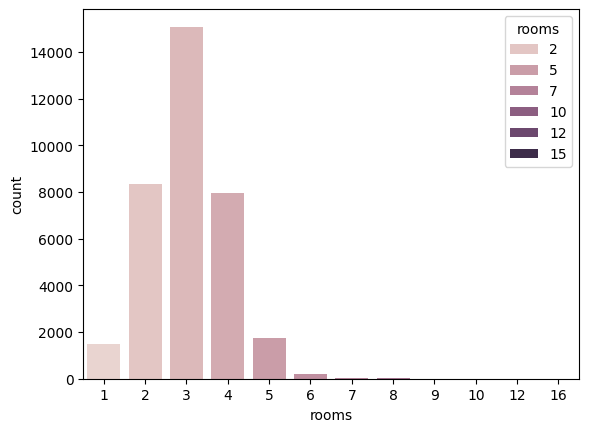

In [70]:
#lets check the number of rooms in each house
sns.countplot(data = df, x = 'rooms', hue = 'rooms')

<Axes: xlabel='type', ylabel='count'>

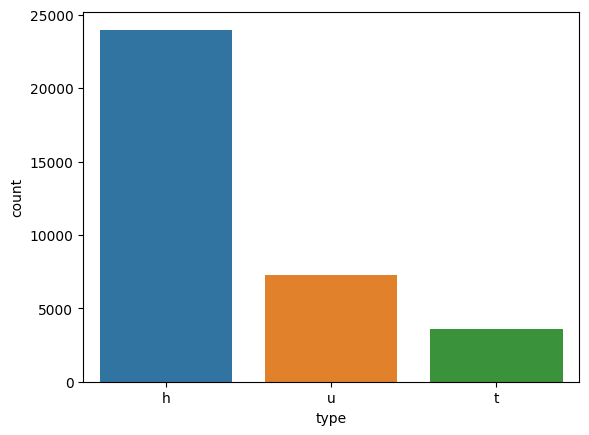

In [71]:
#lets check the number of rooms in each house
sns.countplot(data = df, x = 'type', hue = 'type')


##### 2.1.2 Distribution Plot

The price is logged.


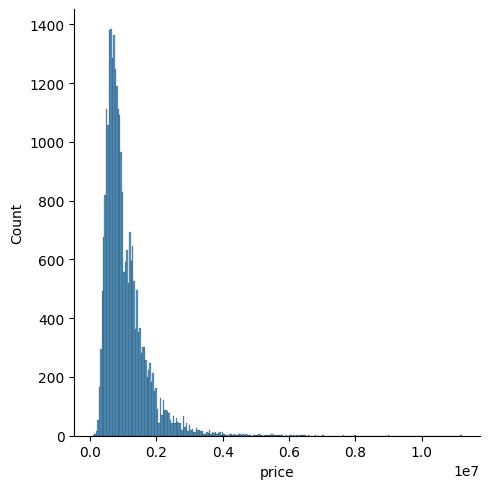

In [75]:
sns.displot(data = df, x = 'price')
print('The price is logged.')

### 2.2 Multivariate Analysis

##### 2.2.1 Box Plot

<Axes: xlabel='type', ylabel='price'>

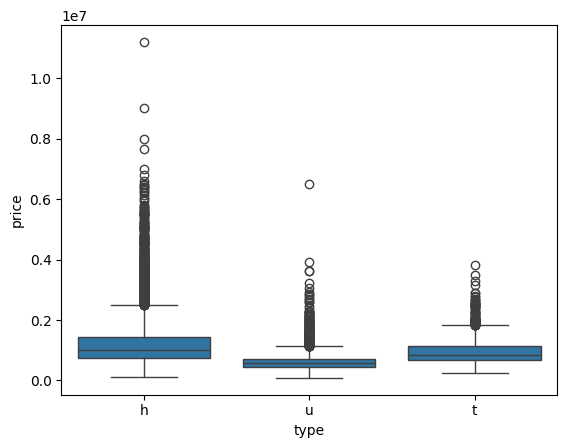

In [77]:
sns.boxplot(data = df, x= 'type', y = 'price')

In [65]:
#total nan values in Price
null_price = df['price'].isnull().sum()
print ('Total number of null values in Price is',null_price,".", "So, this requires some data preprocessing.")

Total number of null values in Price is 7610 . So, this requires some data preprocessing.


In [66]:
# df.isnull().sum()
df

,sub,add,rooms,type,price,sell-meth,seller,date,dist,Postcode,...,bathroom,car,l-size,b-area,build-year,c-area,lati,long,reg-name,prop-count
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


So, we can see a lot of nulls in the dataset. This requires some data processing. 
Lets check the target for this project. 

In [67]:
df['sell-meth'].unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)